In [1]:
import pandas as pd
import os
import glob
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler

CAMBIO PATH PER PRENDERE IL FILE CSV PER LA CREAZIONE DEL DATAFRAME

In [2]:
path_file = os.path.abspath(os.getcwd()) #prendiamo il path in cui si trova il file su cui stiamo lavorando
print(path_file)
os.chdir(path_file) #cambiamo directory al fine di poter prendere i file csv per la creazione del dataframe
data = "\dataset"

c:\Users\pc\Desktop\Università\ADVANCED CYBERSECURITY FOR IT\progetto_corso\AdvancedCyberSecurity


In [3]:
final_path = path_file + data
print(final_path)

c:\Users\pc\Desktop\Università\ADVANCED CYBERSECURITY FOR IT\progetto_corso\AdvancedCyberSecurity\dataset


In [4]:
file_14 = "\Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv"
df_14 = pd.read_csv(final_path + file_14)

In [5]:
pd.set_option('display.max_columns', None)
display(df_14)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632086e+07,1.393000e+02,56320958,56320761,112641719,5.632086e+07,1.393000e+02,56320958,56320761,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632073e+07,1.145513e+02,56320814,56320652,112641466,5.632073e+07,1.145513e+02,56320814,56320652,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026634,5.631931e+07,3.019346e+02,56319525,56319098,112638623,5.631931e+07,3.019346e+02,56319525,56319098,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026634,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,0,227.300000,371.677892,544.161528,3.873587,2.689152e+05,2.474438e+05,673900,22,6453966,4.609976e+05,1.231094e+05,673900,229740,5637902,6.264336e+05,4.550822e+05,1167293,554,0,0,0,0,488,328,2.324152,1.549435,0,976,135.076923,277.834760,77192.153846,0,0,0,1,0,0,0,0,0,140.48,82.600000,227.300000,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,0,200.818182,362.249864,380.733175,2.839597,3.668361e+05,5.113566e+05,1928102,21,8804066,6.772358e+05,5.324170e+05,1928102,246924,7715481,7.715481e+05,7.555431e+05,2174893,90,0,0,0,0,456,360,1.590174,1.249423,0,976,128.923077,279.763032,78267.353846,0,0,0,1,0,0,0,0,0,134.08,81.642857,200.818182,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,217.800000,299.745225,1334,0,384.600000,588.831725,296.544664,0.984544,1.128554e+06,3.290455e+06,9902474,17,254512,6.362800e+04,6.417719e+04,123760,486,10140598,2.535150e+06,4.976408e+06,9999381,6350,0,0,0,0,112,104,0.492272,0.492272,0,1334,273.818182,435.695953,189830.963636,0,0,0,1,0,0,0,0,1,301.20,217.800000,384.600000,0,0,0,0,0,

In [6]:
'''remove = ['Fwd Byts/b Avg','Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg','Fwd PSH Flags','FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt','Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count']

for a in remove:
    df_14.drop(columns=a,axis=1,inplace=True)'''

"remove = ['Fwd Byts/b Avg','Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg','Fwd PSH Flags','FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt','Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count']\n\nfor a in remove:\n    df_14.drop(columns=a,axis=1,inplace=True)"

In [7]:
first = ['Dst Port', 'Protocol', 'Timestamp']

for a in first:
    df_14.drop(columns=a,axis=1,inplace=True)

print(df_14.shape)

(1048575, 77)


GROUP BY RISPETTO ALLE TIPOLOGIE DELL'ATTACCO

In [8]:
df2 = df_14.groupby(['Label'])['Label'].count()
print(df2)

Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64


In [9]:
#abbiamo creato un secondo dataframe per plottare i grafici, in modo da rappresentare le diverse tipologie di attacco
df_14_2 = df_14

In [10]:
df_14 = df_14.replace("Benign", 0)
df_14 = df_14.replace("FTP-BruteForce", 1)
df_14 = df_14.replace("SSH-Bruteforce", 2)
display(df_14)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632086e+07,1.393000e+02,56320958,56320761,112641719,5.632086e+07,1.393000e+02,56320958,56320761,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,0
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632073e+07,1.145513e+02,56320814,56320652,112641466,5.632073e+07,1.145513e+02,56320814,56320652,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,0
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026634,5.631931e+07,3.019346e+02,56319525,56319098,112638623,5.631931e+07,3.019346e+02,56319525,56319098,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0.026634,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,0
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,0,227.300000,371.677892,544.161528,3.873587,2.689152e+05,2.474438e+05,673900,22,6453966,4.609976e+05,1.231094e+05,673900,229740,5637902,6.264336e+05,4.550822e+05,1167293,554,0,0,0,0,488,328,2.324152,1.549435,0,976,135.076923,277.834760,77192.153846,0,0,0,1,0,0,0,0,0,140.48,82.600000,227.300000,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,0
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,0,200.818182,362.249864,380.733175,2.839597,3.668361e+05,5.113566e+05,1928102,21,8804066,6.772358e+05,5.324170e+05,1928102,246924,7715481,7.715481e+05,7.555431e+05,2174893,90,0,0,0,0,456,360,1.590174,1.249423,0,976,128.923077,279.763032,78267.353846,0,0,0,1,0,0,0,0,0,134.08,81.642857,200.818182,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,10156986,5,5,1089,1923,587,0,217.800000,299.745225,1334,0,384.600000,588.831725,296.544664,0.984544,1.128554e+06,3.290455e+06,9902474,17,254512,6.362800e+04,6.417719e+04,123760,486,10140598,2.535150e+06,4.976408e+06,9999381,6350,0,0,0,0,112,104,0.492272,0.492272,0,1334,273.818182,435.695953,189830.963636,0,0,0,1,0,0,0,0,1,301.20,217.800000,384.600000,0,0,0,0,0,0,5,1089,5,1923,8192,31111,2,20,0.0,0.0,0,0,0.0,0.000000,0,0,0
1048571,117,2,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,17094.017094,1.170000e+02,0.000000e+00,117,117,117,1.170000e+02,0.000000e+00

RIMOZIONE RIGHE CON CAMPI NULLI

In [11]:
for a in df_14.head(0):
    if(df_14[a].isna().sum() > 0):
        print(a)

Flow Byts/s


In [12]:
print(df_14.shape)

(1048575, 77)


In [13]:
df_14.dropna(inplace=True)
df_14_2.dropna(inplace=True)

In [14]:
print(df_14.shape)

(1046298, 77)


NORMALIZZAZIONE DEI VALORI PER APPLICAZIONE ANOVA

In [15]:
scaled = df_14.head(0)

for a in df_14.head(0):
    if df_14[a].max() != 0 and a != 'Label':
        scaled[a] = df_14[a]/df_14[a].max()
    else:
        scaled[a] = df_14[a]
        print("uguale a 0 " + str(a))

uguale a 0 Bwd PSH Flags
uguale a 0 Fwd URG Flags
uguale a 0 Bwd URG Flags
uguale a 0 CWE Flag Count
uguale a 0 Fwd Byts/b Avg
uguale a 0 Fwd Pkts/b Avg
uguale a 0 Fwd Blk Rate Avg
uguale a 0 Bwd Byts/b Avg
uguale a 0 Bwd Pkts/b Avg
uguale a 0 Bwd Blk Rate Avg
uguale a 0 Label


In [16]:
scaled_2 = df_14_2.head(0)

for a in df_14_2.head(0):
    if df_14_2[a].max() != 0 and a != 'Label':
        scaled_2[a] = df_14_2[a]/df_14_2[a].max()
    else:
        scaled_2[a] = df_14_2[a]
        print("uguale a 0 " + str(a))

uguale a 0 Bwd PSH Flags
uguale a 0 Fwd URG Flags
uguale a 0 Bwd URG Flags
uguale a 0 CWE Flag Count
uguale a 0 Fwd Byts/b Avg
uguale a 0 Fwd Pkts/b Avg
uguale a 0 Fwd Blk Rate Avg
uguale a 0 Bwd Byts/b Avg
uguale a 0 Bwd Pkts/b Avg
uguale a 0 Bwd Blk Rate Avg
uguale a 0 Label


In [17]:
print(scaled.shape)

(1046298, 77)


RIMOZIONE RIGHE CON CAMPI NULLI

In [18]:
for a in scaled.head(0):
    if(scaled[a].isna().sum() > 0):
        print(str(a) + " " + str(scaled[a].isna().sum()))

Flow Byts/s 1547
Flow Pkts/s 1547


In [19]:
scaled.dropna(inplace=True)
scaled_2.dropna(inplace=True)

In [20]:
display(scaled)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,9.386811e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,9.386822e-01,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658279e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,5.726192e-10,0.000057,0.004469,0
1,9.386790e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,9.386801e-01,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658294e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,4.708848e-10,0.000057,0.004469,0
2,9.386553e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,9.386564e-01,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658462e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,1.241159e-09,0.000057,0.004469,0
3,5.378305e-02,0.002933,0.001087,0.000144,0.000170,0.011546,0.0,0.007364,0.012483,0.668493,0.0,0.155766,0.393437,0.0,0.0,2.241134e-03,5.829423e-07,6.878068e-07,1.833475e-07,5.378312e-02,3.841944e-03,2.900283e-07,6.878068e-07,1.914648e-03,0.046983,0.005246,0.005387,0.009763,4.639853e-06,0.0,0,0,0,0.003095,0.001783,5.810381e-07,7.747174e-07,0.0,0.015146,0.053578,0.031534,0.000994,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.055699,0.007364,0.155766,0,0,0,0,0,0,0.002933,0.000144,0.001087,0.000170,1.000000,0.003555,0.00582,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0
4,7.336722e-02,0.002737,0.001196,0.000133,0.000165,0.011546,0.0,0.007278,0.012927,0.668493,0.0,0.137618,0.383457,0.0,0.0,3.057204e-03,1.204683e-06,1.967891e-06,1.750135e-07,7.336731e-02,5.644068e-03,1.254298e-06,1.967891e-06,2.057859e-03,0.064296,0.006462,0.008944,0.018190,7.537668e-07,0.0,0,0,0,0.002892,0.001957,3.975436e-07,6.247114e-07,0.0,0.015146,0.051137,0.031752,0.001008,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.053161,0.007278,0.137618,0,0,0,0,0,0,0.002737,0.000133,0.001196,0.000165,0.088624,0.003555,0.00582,0.666667,0.0

In [21]:
display(scaled_2)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,9.386811e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,9.386822e-01,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658279e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,5.726192e-10,0.000057,0.004469,Benign
1,9.386790e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,9.386801e-01,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658294e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,4.708848e-10,0.000057,0.004469,Benign
2,9.386553e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,9.386564e-01,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658462e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,1.241159e-09,0.000057,0.004469,Benign
3,5.378305e-02,0.002933,0.001087,0.000144,0.000170,0.011546,0.0,0.007364,0.012483,0.668493,0.0,0.155766,0.393437,0.0,0.0,2.241134e-03,5.829423e-07,6.878068e-07,1.833475e-07,5.378312e-02,3.841944e-03,2.900283e-07,6.878068e-07,1.914648e-03,0.046983,0.005246,0.005387,0.009763,4.639853e-06,0.0,0,0,0,0.003095,0.001783,5.810381e-07,7.747174e-07,0.0,0.015146,0.053578,0.031534,0.000994,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.055699,0.007364,0.155766,0,0,0,0,0,0,0.002933,0.000144,0.001087,0.000170,1.000000,0.003555,0.00582,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,Benign
4,7.336722e-02,0.002737,0.001196,0.000133,0.000165,0.011546,0.0,0.007278,0.012927,0.668493,0.0,0.137618,0.383457,0.0,0.0,3.057204e-03,1.204683e-06,1.967891e-06,1.750135e-07,7.336731e-02,5.644068e-03,1.254298e-06,1.967891e-06,2.057859e-03,0.064296,0.006462,0.008944,0.018190,7.537668e-07,0.0,0,0,0,0.002892,0.001957,3.975436e-07,6.247114e-07,0.0,0.015146,0.051137,0.031752,0.001008,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.053161,0.007278,0.137618,0,0,0,0,0,0,0.002737,0.000133,0.001196,0.000165,0.088624,0.003555,

# Selezione feature più importanti (mediante ANOVA)

In [22]:
x = scaled.iloc[:,:-1]
y = scaled.iloc[:,-1:]

In [23]:
print(x.shape)

(1044751, 76)


In [24]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_classif, k=10)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest()
[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True False False False False False False False False  True False  True
 False False False  True  True False False False False False False False
 False False False False  True False  True  True False False False False
 False False False False]


c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [13 14 30 31 32 48 54 55 56 57 58 59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [25]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(10,columns="F_Score"))

       Input_Features       F_Score
67   Fwd Seg Size Min  2.222642e+06
36         Bwd Pkts/s  1.264629e+06
35         Fwd Pkts/s  5.046591e+05
64  Init Fwd Win Byts  3.856828e+05
47       URG Flag Cnt  2.199751e+05
66  Fwd Act Data Pkts  1.408426e+05
45       PSH Flag Cnt  1.384423e+05
51       Pkt Size Avg  7.881787e+04
7    Fwd Pkt Len Mean  7.282460e+04
52   Fwd Seg Size Avg  7.282460e+04


In [26]:
#creazione di una lista in cui andiamo a mettere le feature che non sono state selezionate dal metodo ANOVA
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 46, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 74, 75]


RIMOZIONE DELLE FEATURE NON SELEZIONATE

In [27]:
x_simo = x

x=x.drop(x.columns[index_false],axis = 1)
print(x)

         Fwd Pkt Len Mean    Fwd Pkts/s    Bwd Pkts/s  PSH Flag Cnt   
0                0.000000  6.658279e-09  0.000000e+00           0.0  \
1                0.000000  6.658294e-09  0.000000e+00           0.0   
2                0.000000  6.658462e-09  0.000000e+00           0.0   
3                0.007364  5.810381e-07  7.747174e-07           1.0   
4                0.007278  3.975436e-07  6.247114e-07           1.0   
...                   ...           ...           ...           ...   
1048570          0.019417  1.230680e-07  2.461360e-07           1.0   
1048571          0.000000  4.273504e-03  0.000000e+00           0.0   
1048572          0.000000  1.471936e-07  9.812905e-08           1.0   
1048573          0.000000  1.432525e-07  9.550166e-08           1.0   
1048574          0.004859  2.582976e-07  3.443967e-07           1.0   

         URG Flag Cnt  Pkt Size Avg  Fwd Seg Size Avg  Init Fwd Win Byts   
0                 0.0      0.000000          0.000000          -0.00001

PLOT DELLE COMBINAZIONI TRA FEATURES

In [28]:
from itertools import combinations
comb = list(combinations(x.head(0), 2))
colors = { 'FTP-BruteForce':'orange', 'SSH-Bruteforce':'black','Benign':'red'}

In [29]:
print(comb)

[('Fwd Pkt Len Mean', 'Fwd Pkts/s'), ('Fwd Pkt Len Mean', 'Bwd Pkts/s'), ('Fwd Pkt Len Mean', 'PSH Flag Cnt'), ('Fwd Pkt Len Mean', 'URG Flag Cnt'), ('Fwd Pkt Len Mean', 'Pkt Size Avg'), ('Fwd Pkt Len Mean', 'Fwd Seg Size Avg'), ('Fwd Pkt Len Mean', 'Init Fwd Win Byts'), ('Fwd Pkt Len Mean', 'Fwd Act Data Pkts'), ('Fwd Pkt Len Mean', 'Fwd Seg Size Min'), ('Fwd Pkts/s', 'Bwd Pkts/s'), ('Fwd Pkts/s', 'PSH Flag Cnt'), ('Fwd Pkts/s', 'URG Flag Cnt'), ('Fwd Pkts/s', 'Pkt Size Avg'), ('Fwd Pkts/s', 'Fwd Seg Size Avg'), ('Fwd Pkts/s', 'Init Fwd Win Byts'), ('Fwd Pkts/s', 'Fwd Act Data Pkts'), ('Fwd Pkts/s', 'Fwd Seg Size Min'), ('Bwd Pkts/s', 'PSH Flag Cnt'), ('Bwd Pkts/s', 'URG Flag Cnt'), ('Bwd Pkts/s', 'Pkt Size Avg'), ('Bwd Pkts/s', 'Fwd Seg Size Avg'), ('Bwd Pkts/s', 'Init Fwd Win Byts'), ('Bwd Pkts/s', 'Fwd Act Data Pkts'), ('Bwd Pkts/s', 'Fwd Seg Size Min'), ('PSH Flag Cnt', 'URG Flag Cnt'), ('PSH Flag Cnt', 'Pkt Size Avg'), ('PSH Flag Cnt', 'Fwd Seg Size Avg'), ('PSH Flag Cnt', 'Init 

In [30]:
print(len(comb))

45


In [31]:
display(scaled)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,9.386811e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,9.386822e-01,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658279e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,5.726192e-10,0.000057,0.004469,0
1,9.386790e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,9.386801e-01,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658294e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,4.708848e-10,0.000057,0.004469,0
2,9.386553e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,9.386564e-01,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658462e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,1.241159e-09,0.000057,0.004469,0
3,5.378305e-02,0.002933,0.001087,0.000144,0.000170,0.011546,0.0,0.007364,0.012483,0.668493,0.0,0.155766,0.393437,0.0,0.0,2.241134e-03,5.829423e-07,6.878068e-07,1.833475e-07,5.378312e-02,3.841944e-03,2.900283e-07,6.878068e-07,1.914648e-03,0.046983,0.005246,0.005387,0.009763,4.639853e-06,0.0,0,0,0,0.003095,0.001783,5.810381e-07,7.747174e-07,0.0,0.015146,0.053578,0.031534,0.000994,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.055699,0.007364,0.155766,0,0,0,0,0,0,0.002933,0.000144,0.001087,0.000170,1.000000,0.003555,0.00582,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0
4,7.336722e-02,0.002737,0.001196,0.000133,0.000165,0.011546,0.0,0.007278,0.012927,0.668493,0.0,0.137618,0.383457,0.0,0.0,3.057204e-03,1.204683e-06,1.967891e-06,1.750135e-07,7.336731e-02,5.644068e-03,1.254298e-06,1.967891e-06,2.057859e-03,0.064296,0.006462,0.008944,0.018190,7.537668e-07,0.0,0,0,0,0.002892,0.001957,3.975436e-07,6.247114e-07,0.0,0.015146,0.051137,0.031752,0.001008,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.053161,0.007278,0.137618,0,0,0,0,0,0,0.002737,0.000133,0.001196,0.000165,0.088624,0.003555,0.00582,0.666667,0.0

In [32]:
'''scaled['Label'] = scaled['Label'].replace(0, "Benign")
scaled['Label'] = scaled['Label'].replace(1, "FTP-BruteForce")
scaled['Label'] = scaled['Label'].replace(2, "SSH-Bruteforce")
display(scaled)'''

'scaled[\'Label\'] = scaled[\'Label\'].replace(0, "Benign")\nscaled[\'Label\'] = scaled[\'Label\'].replace(1, "FTP-BruteForce")\nscaled[\'Label\'] = scaled[\'Label\'].replace(2, "SSH-Bruteforce")\ndisplay(scaled)'

In [33]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

'''for a in comb:
    fig, ax = plt.subplots()
    ax.scatter(scaled_2[a[0]],scaled_2[a[1]],c=scaled_2['Label'].map(colors),alpha=.1)
    handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
    plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(str(a[0])+'-'+str(a[1]))'''

"for a in comb:\n    fig, ax = plt.subplots()\n    ax.scatter(scaled_2[a[0]],scaled_2[a[1]],c=scaled_2['Label'].map(colors),alpha=.1)\n    handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]\n    plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')\n    plt.title(str(a[0])+'-'+str(a[1]))"

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_simo, y)

C:\Users\pc\AppData\Local\Temp\ipykernel_16764\4267758375.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(x_simo, y)


In [35]:
features_score = pd.DataFrame(clf.feature_importances_)
features = pd.DataFrame(x_simo.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(15,columns="F_Score"))

       Input_Features   F_Score
67   Fwd Seg Size Min  0.211872
64  Init Fwd Win Byts  0.100253
36         Bwd Pkts/s  0.095761
47       URG Flag Cnt  0.087214
45       PSH Flag Cnt  0.068753
9     Bwd Pkt Len Max  0.046177
35         Fwd Pkts/s  0.033536
33     Fwd Header Len  0.030608
46       ACK Flag Cnt  0.028654
4     TotLen Bwd Pkts  0.024894
11   Bwd Pkt Len Mean  0.019914
53   Bwd Seg Size Avg  0.019094
1        Tot Fwd Pkts  0.017449
65  Init Bwd Win Byts  0.016631
12    Bwd Pkt Len Std  0.016581


In [36]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.svm import LinearSVC

features_names = x_simo.head(0)
svm = svm.SVC(kernel='linear',max_iter=350)
svm.fit(x_simo, y)

'''lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=500)
lsvc = lsvc.fit(x, y)'''


c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=350).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


'lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=500)\nlsvc = lsvc.fit(x, y)'

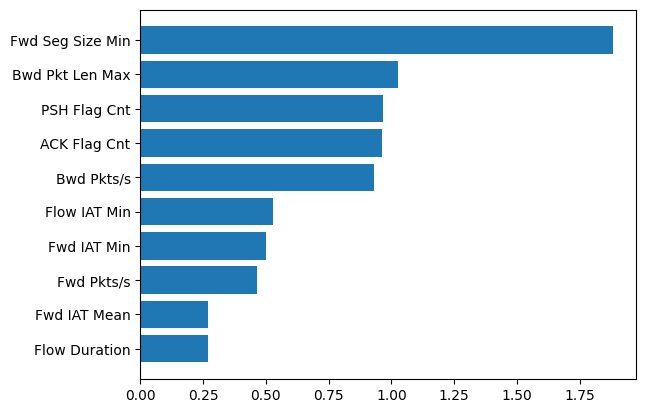

In [37]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names[-10:])), imp[-10:], align='center')
    plt.yticks(range(len(names[-10:])), names[-10:])
    plt.show()

#print(svm.dual_coef_)
f_importances(abs(svm.coef_[0]), features_names)

In [38]:
for a in sorted(zip(abs(svm.coef_[0]),features_names),reverse=True):
    print(a)

(1.8812743765668642, 'Fwd Seg Size Min')
(1.027998619658987, 'Bwd Pkt Len Max')
(0.9665630340695941, 'PSH Flag Cnt')
(0.9634419047916088, 'ACK Flag Cnt')
(0.9318414773253878, 'Bwd Pkts/s')
(0.5295389193063896, 'Flow IAT Min')
(0.5021106952535347, 'Fwd IAT Min')
(0.46597827962050076, 'Fwd Pkts/s')
(0.26906291352963474, 'Fwd IAT Mean')
(0.26754529678989936, 'Flow Duration')
(0.26546784831075165, 'Fwd IAT Tot')
(0.24569811601287805, 'Flow IAT Mean')
(0.2304260892802581, 'Down/Up Ratio')
(0.14535828629094413, 'Bwd Pkt Len Std')
(0.10134566484829766, 'Bwd Pkt Len Min')
(0.10081274152157249, 'Init Fwd Win Byts')
(0.09243428966576396, 'Active Min')
(0.09243428966576396, 'Active Mean')
(0.09243428966576396, 'Active Max')
(0.07843482693018274, 'Bwd Seg Size Avg')
(0.07843482693018274, 'Bwd Pkt Len Mean')
(0.061868738305369896, 'Bwd Header Len')
(0.061749157858953616, 'Tot Bwd Pkts')
(0.061749157858953616, 'Subflow Bwd Pkts')
(0.05560732303073129, 'Init Bwd Win Byts')
(0.05018667425151952, 'Bwd 

In [39]:
print(features_names)

Empty DataFrame
Columns: [Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, TotLen Fwd Pkts, TotLen Bwd Pkts, Fwd Pkt Len Max, Fwd Pkt Len Min, Fwd Pkt Len Mean, Fwd Pkt Len Std, Bwd Pkt Len Max, Bwd Pkt Len Min, Bwd Pkt Len Mean, Bwd Pkt Len Std, Flow Byts/s, Flow Pkts/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Tot, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Tot, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Len, Bwd Header Len, Fwd Pkts/s, Bwd Pkts/s, Pkt Len Min, Pkt Len Max, Pkt Len Mean, Pkt Len Std, Pkt Len Var, FIN Flag Cnt, SYN Flag Cnt, RST Flag Cnt, PSH Flag Cnt, ACK Flag Cnt, URG Flag Cnt, CWE Flag Count, ECE Flag Cnt, Down/Up Ratio, Pkt Size Avg, Fwd Seg Size Avg, Bwd Seg Size Avg, Fwd Byts/b Avg, Fwd Pkts/b Avg, Fwd Blk Rate Avg, Bwd Byts/b Avg, Bwd Pkts/b Avg, Bwd Blk Rate Avg, Subflow Fwd Pkts, Subflow Fwd Byts, Subflow Bwd Pkts, Subflow Bwd Byts, Init Fwd Wi

In [40]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
# define dataset
#X, y = make_classification(n_samples=1044751, n_features=76, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(x_simo, y)
# summarize all features


RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [41]:
for i in range(76):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 71.000
Column: 1, Selected False, Rank: 70.000
Column: 2, Selected False, Rank: 69.000
Column: 3, Selected False, Rank: 68.000
Column: 4, Selected False, Rank: 67.000
Column: 5, Selected False, Rank: 66.000
Column: 6, Selected False, Rank: 65.000
Column: 7, Selected False, Rank: 64.000
Column: 8, Selected False, Rank: 63.000
Column: 9, Selected False, Rank: 62.000
Column: 10, Selected False, Rank: 61.000
Column: 11, Selected False, Rank: 60.000
Column: 12, Selected False, Rank: 59.000
Column: 13, Selected False, Rank: 58.000
Column: 14, Selected False, Rank: 57.000
Column: 15, Selected False, Rank: 55.000
Column: 16, Selected False, Rank: 54.000
Column: 17, Selected False, Rank: 53.000
Column: 18, Selected False, Rank: 52.000
Column: 19, Selected False, Rank: 49.000
Column: 20, Selected False, Rank: 48.000
Column: 21, Selected False, Rank: 47.000
Column: 22, Selected False, Rank: 46.000
Column: 23, Selected False, Rank: 45.000
Column: 24, Selected False

In [44]:
features_score = pd.DataFrame(rfe.ranking_)
features = pd.DataFrame(x_simo.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
feature_score.sort_values('F_Score',inplace=True,ascending=False,axis=0)
print(feature_score.nsmallest(20,columns="F_Score"))

       Input_Features  F_Score
36         Bwd Pkts/s        1
35         Fwd Pkts/s        1
64  Init Fwd Win Byts        1
67   Fwd Seg Size Min        1
65  Init Bwd Win Byts        1
71         Active Min        2
70         Active Max        3
69         Active Std        4
68        Active Mean        5
66  Fwd Act Data Pkts        6
43       SYN Flag Cnt        7
42       FIN Flag Cnt        8
41        Pkt Len Var        9
40        Pkt Len Std       10
39       Pkt Len Mean       11
38        Pkt Len Max       12
72          Idle Mean       13
44       RST Flag Cnt       14
73           Idle Std       15
46       ACK Flag Cnt       16
